# TELECOM CUSTOMER CHURN EDA & PREDICTION

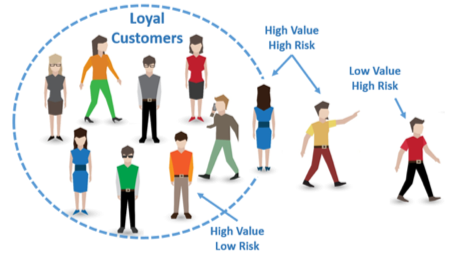

### Introduction

What is Customer Churn?

Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

### Loading libraries

In [1]:
#import all the libraries
import numpy as np
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


### Loading Data

In [79]:
#read csv file or data set
maindata = pd.read_csv('C:\\Users\\NEW LIFE\\Downloads\\the sapalogy project\\Telco-Customer-Churn.csv')
# create always main dataset copy.
df = maindata.copy()
df = pd.DataFrame(df)
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
#for checking shape of data set
df.shape

(7043, 21)

In [4]:
#for checking data types of data
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
#customerID 
df1=df.drop('customerID' , axis=1 )
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#for checking information of data set
df.shape
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
#for checking null values of data set
df.shape
print(df1.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
#for checking the target variable is balance or not
df1['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Data Preprocessing for EDA
# Data Exploration


<AxesSubplot:>

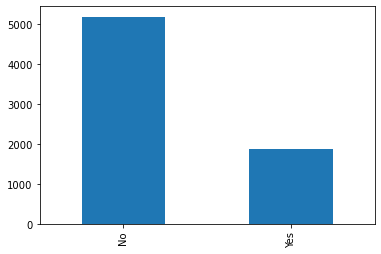

In [9]:
#display a frequency distribution for churn
df1['Churn'].value_counts().plot.bar()

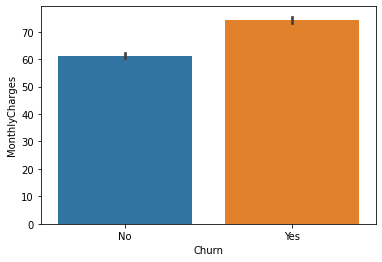

In [10]:
sns.barplot(x='Churn',y='MonthlyCharges',data=df1)

plt.show()

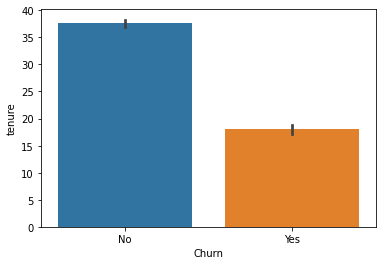

In [11]:
sns.barplot(x='Churn',y='tenure',data=df1)


plt.show()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

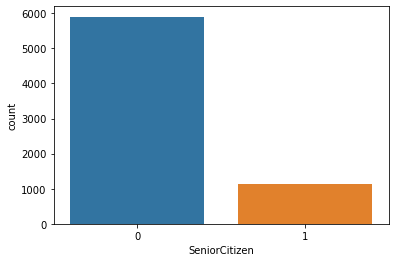

In [12]:
sns.countplot(x = "SeniorCitizen", data = df1)
df.loc[:, 'SeniorCitizen'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

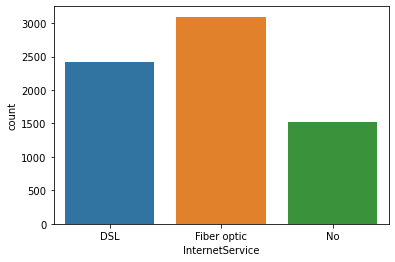

In [13]:
sns.countplot(x = "InternetService", data = df1)
df.loc[:, 'InternetService'].value_counts()

Text(0.5, 1.0, ' ')

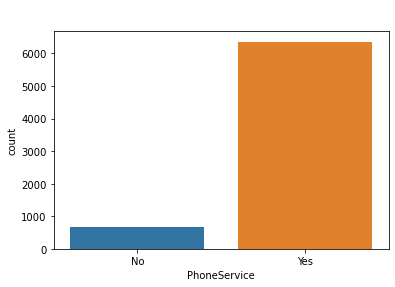

In [14]:
sns.countplot(x = "PhoneService", data = df1)
df.loc[:, 'PhoneService'].value_counts()
plt.title(" ",size=24)

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

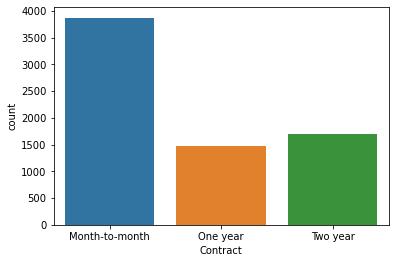

In [15]:
sns.countplot(x = "Contract", data = df1)
df.loc[:, 'Contract'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

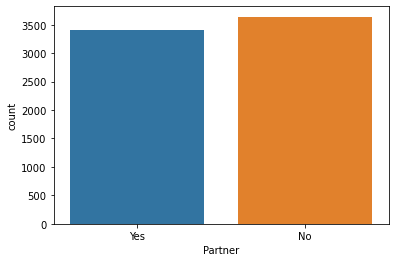

In [16]:
sns.countplot(x = "Partner", data = df1)
df.loc[:, 'Partner'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

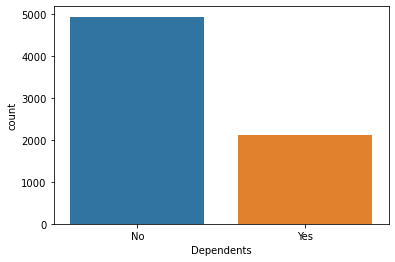

In [17]:
sns.countplot(x = "Dependents", data = df1)
df.loc[:, 'Dependents'].value_counts()

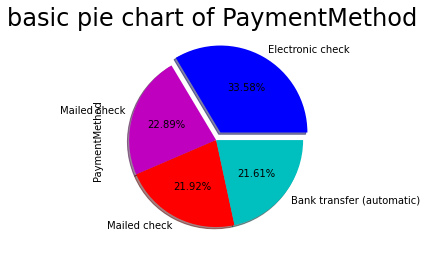

In [18]:
mycolors = ["blue", "m", "r", "c"]
R=df1['PaymentMethod'].value_counts()
R.plot.pie( explode = [0.1,0,0,0],labels = df1['PaymentMethod'],autopct='%1.2f%%',shadow = True,colors = mycolors);
plt.title("basic pie chart of PaymentMethod ",size=24);

# Feature Engineering


In [19]:
# Label encoding 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for i in df1.columns:
    if df1[i].dtypes=="object":
        df1[i]=label_encoder.fit_transform(df[i])
    

In [20]:
#checking dtype
df1.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [21]:
!pip install imblearn

In [22]:
#create a x= feature ,y=target varible
x=df1.drop(columns='Churn')
y=df1['Churn']

In [23]:
#our data is imbalance,to get balance data we use SMOTE
from imblearn.over_sampling import SMOTE
sm =SMOTE(sampling_strategy='minority')
x_sm, y_sm= sm.fit_resample(x,y)

0    5174
1    5174
Name: Churn, dtype: int64


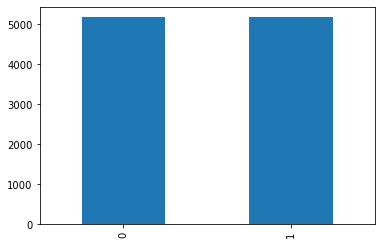

AxesSubplot(0.125,0.125;0.775x0.755) None


In [24]:
#again we check the target variable after using SMOTE whether data is balanced or not
print(y_sm.value_counts())
print(y_sm.value_counts().plot.bar(),
     plt.show())

In [25]:
#applying train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, random_state = 1)

In [26]:
#Feature Rescaling: standerScaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<AxesSubplot:>

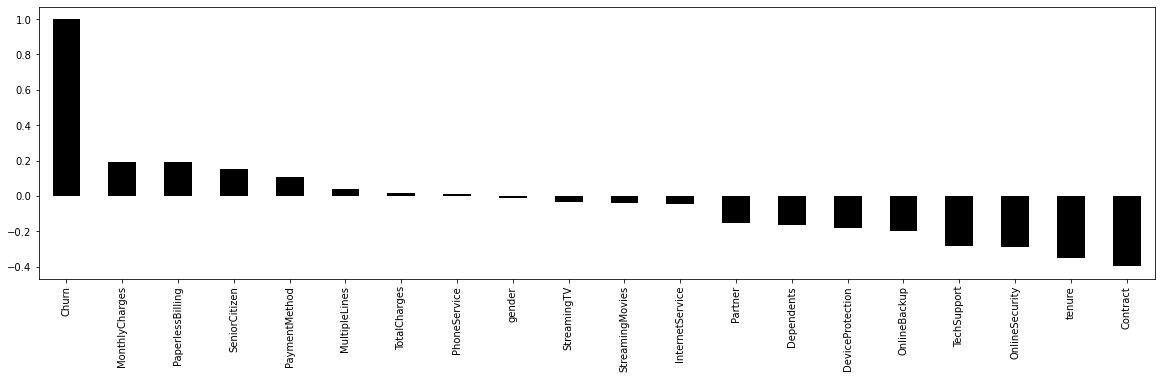

In [27]:
#Correlation analysis
#show correlation plot for correlation of churn with each of the feature

plt.figure(figsize=(16,10))
df1.corr()["Churn"].sort_values(ascending=False).plot(kind='bar',figsize=(20,5),color="black")

# #Model Evaluation

In [28]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)

classifier.fit(x_train, y_train)  #fitting logistic regression

LogisticRegression(random_state=0)

In [29]:
y_pred_log = classifier.predict(x_test)

In [30]:
#Confusion matrix for LogisticRegression
from sklearn.metrics import confusion_matrix

cm_log = confusion_matrix(y_test, y_pred_log)
print(cm_log)

[[1015  315]
 [ 211 1046]]


Text(0.5, 257.44, 'Predicted label')

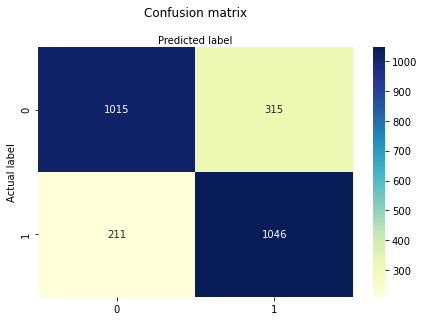

In [31]:
#heat map of confusion matrics
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm_log), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
#Model Evaluation
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_log))
print("Precision:",metrics.precision_score(y_test, y_pred_log))
print("Recall:",metrics.recall_score(y_test, y_pred_log))
print("f1:",metrics.f1_score(y_test,y_pred_log))

Accuracy: 0.7966756861229223
Precision: 0.7685525349008082
Recall: 0.8321400159108989
f1: 0.7990832696715049


In [33]:
from sklearn import metrics
print("---Metrices---")
print(metrics.classification_report(y_true = y_test, y_pred = y_pred_log))

---Metrices---
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1330
           1       0.77      0.83      0.80      1257

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587



In [34]:
from sklearn.metrics import roc_curve, auc

#---find the predicted probabilities using the test set
probs_log = classifier.predict_proba(x_test)
preds_log = probs_log[:,1]

#---find the FPR, TPR, and threshold---
fpr, tpr, threshold = roc_curve(y_test, preds_log)

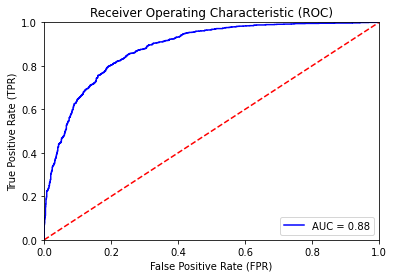

In [35]:
#---find the area under the curve---

roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

In [36]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 50, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=50)

In [37]:
y_pred_knn = classifier.predict(x_test)

In [38]:
#confusion matrics for KNN
cm_knn= confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[ 879  451]
 [ 124 1133]]


Text(0.5, 257.44, 'Predicted label')

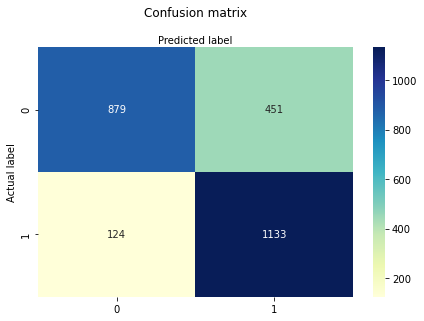

In [39]:
#heat map of confusion matrics
class_names=[0,1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm_knn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [40]:
##Model Evaluation KNN
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:",metrics.precision_score(y_test, y_pred_knn))
print("Recall:",metrics.recall_score(y_test, y_pred_knn))
print("f1:",metrics.f1_score(y_test,y_pred_knn))

Accuracy: 0.7777348279860843
Precision: 0.7152777777777778
Recall: 0.9013524264120922
f1: 0.7976064765927491


In [41]:
print("---Metrices---")
print(metrics.classification_report(y_true = y_test, y_pred = y_pred_knn))

---Metrices---
              precision    recall  f1-score   support

           0       0.88      0.66      0.75      1330
           1       0.72      0.90      0.80      1257

    accuracy                           0.78      2587
   macro avg       0.80      0.78      0.78      2587
weighted avg       0.80      0.78      0.77      2587



In [42]:
probs_knn = classifier.predict_proba(x_test)

In [43]:
preds_knn = probs_knn[:,1]

#---find the FPR, TPR, and threshold---
fpr, tpr, threshold = roc_curve(y_test, preds_knn)

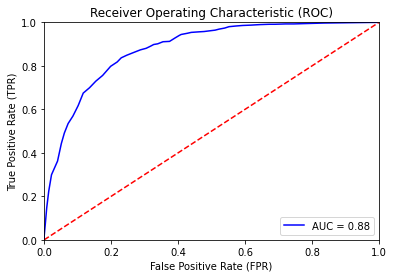

In [44]:
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

In [45]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
RandomForestClassifier(criterion='entropy', random_state=0)

RandomForestClassifier(criterion='entropy', random_state=0)

In [46]:
classifier = classifier.fit(x_train,y_train)

In [47]:
y_pred_rd = classifier.predict(x_test)

In [48]:
#confusion matrics for random forest
cm_rand = confusion_matrix(y_test, y_pred_rd)
print(cm_rand)

[[1112  218]
 [ 182 1075]]


Text(0.5, 257.44, 'Predicted label')

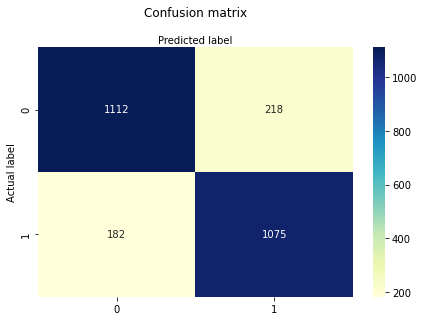

In [49]:
##heat map of confusion matrics
class_names=[0,1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm_rand), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [50]:
#Model Evaluation random forest
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rd))
print("Precision:",metrics.precision_score(y_test, y_pred_rd))
print("Recall:",metrics.recall_score(y_test, y_pred_rd))
print("f1:",metrics.f1_score(y_test,y_pred_rd))


Accuracy: 0.845380749903363
Precision: 0.831399845320959
Recall: 0.8552108194112967
f1: 0.8431372549019607


In [51]:
print("---Metrices---")
print(metrics.classification_report(y_true = y_test, y_pred = y_pred_rd))

---Metrices---
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1330
           1       0.83      0.86      0.84      1257

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587



In [52]:
probs_rd = classifier.predict_proba(x_test)
preds_rd = probs_rd[:,1]

#---find the FPR, TPR, and threshold---
fpr, tpr, threshold = roc_curve(y_test, preds_rd)

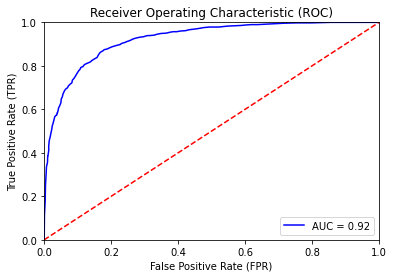

In [53]:
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

In [54]:
#Support Vector Machine
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)

In [55]:
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [56]:
y_pred_svc = classifier.predict(x_test)

In [57]:
#confusion matrics for svm
cm_svc= confusion_matrix(y_test, y_pred_svc)
print(cm_svc)

[[ 990  340]
 [ 188 1069]]


Text(0.5, 257.44, 'Predicted label')

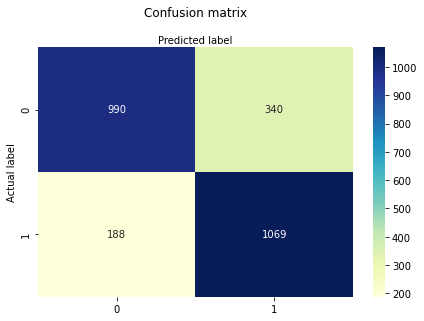

In [58]:
#heat map of confusion matrics
class_names=[0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm_svc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [59]:
#Model Evaluation for svm
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svc))
print("Precision:",metrics.precision_score(y_test, y_pred_svc))
print("Recall:",metrics.recall_score(y_test, y_pred_svc))
print("f1:",metrics.f1_score(y_test,y_pred_svc))


Accuracy: 0.7959025898724391
Precision: 0.758694109297374
Recall: 0.8504375497215593
f1: 0.8019504876219056


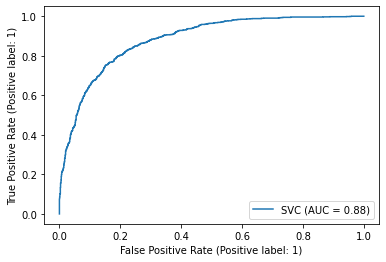

In [60]:
from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(classifier, x_test, y_test)
plt.show()

# Hyperparameter Tuning/Model Improvement

In [61]:
#Hyperparameter Tuning for KNN
from sklearn.model_selection import GridSearchCV
para_grid={"n_neighbors":np.arange(1,30)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,para_grid,cv=5,scoring="accuracy",n_jobs=-1)
knn_cv.fit(x_train,y_train)
y_pred_knn_tuned=knn_cv.predict(x_test)
y_pred_knn_tuned_prob=knn_cv.predict_proba(x_test)
print("KNN best number of neighbors :",knn_cv.best_params_,"\n")
print("KNN best accuracy :",knn_cv.best_score_)

KNN best number of neighbors : {'n_neighbors': 8} 

KNN best accuracy : 0.8022176067604437


In [62]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 14, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)
y_pred_knn1 = classifier.predict(x_test)


In [63]:
#confusion matrics dor KNN after Hyperparameter Tuning 
cm_knn1 = confusion_matrix(y_test, y_pred_knn1)
print(cm_knn1)

[[ 932  398]
 [ 165 1092]]


Text(0.5, 257.44, 'Predicted label')

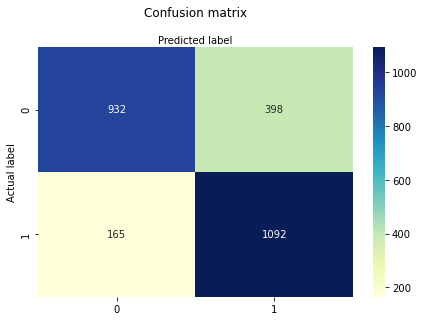

In [64]:
##heat map of confusion matrics
class_names=[0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm_knn1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [65]:
#Model Evaluation for KNN after Hyperparameter Tuning
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn1))
print("Precision:",metrics.precision_score(y_test, y_pred_knn1))
print("Recall:",metrics.recall_score(y_test, y_pred_knn1))
print("f1:",metrics.f1_score(y_test,y_pred_knn1))


Accuracy: 0.7823734054889834
Precision: 0.7328859060402685
Recall: 0.8687350835322196
f1: 0.795049144521296


In [66]:
probs_knn1 = classifier.predict_proba(x_test)
preds_knn1 = probs_knn1[:,1]

#---find the FPR, TPR, and threshold---
fpr, tpr, threshold = roc_curve(y_test, preds_knn1)

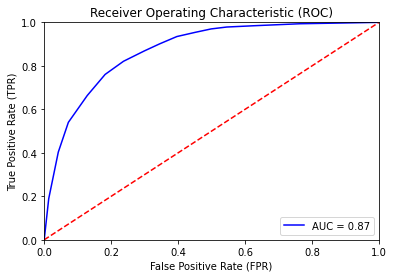

In [67]:
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

In [68]:
#Hyperparameter Tuning for random forest
from sklearn.model_selection import GridSearchCV

parameters = [{'n_estimators' : np.arange(50,200,10),'criterion':['gini','entropy'],
               'max_depth' : np.arange(10,25,5),'bootstrap':[True,False]}]
rf=RandomForestClassifier()
grid_search = GridSearchCV(estimator =rf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)

In [69]:
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_ 


In [70]:
print("Best Accuracy: {:.2f} %".format(best_accuracy*100,'\n'))
print("Best Parameters:", best_parameters)


Best Accuracy: 84.89 %
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'n_estimators': 160}


In [73]:
from sklearn.ensemble import RandomForestClassifier
 
classifier = RandomForestClassifier(n_estimators = 169, criterion = 'gini',
                                    bootstrap=False,max_depth=15, random_state = 0)
classifier.fit(x_train, y_train)  
RandomForestClassifier()
classifier = classifier.fit(x_train,y_train)
y_pred_rd1 = classifier.predict(x_test)

In [74]:
#confusion matrics dor random forest after Hyperparameter Tuning 
cm_rand1 = confusion_matrix(y_test, y_pred_rd1)
print(cm_rand1)

[[1101  229]
 [ 165 1092]]


Text(0.5, 257.44, 'Predicted label')

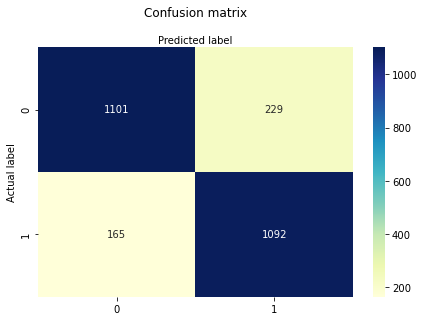

In [75]:
#heat map of confusion matrics
class_names=[0,1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm_rand1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [76]:
##Model Evaluation for random forest after Hyperparameter Tuning
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rd1))
print("Precision:",metrics.precision_score(y_test, y_pred_rd1))
print("Recall:",metrics.recall_score(y_test, y_pred_rd1))
print("f1:",metrics.f1_score(y_test,y_pred_rd1))


Accuracy: 0.8477000386548125
Precision: 0.8266464799394398
Recall: 0.8687350835322196
f1: 0.8471683475562453


In [77]:
probs = classifier.predict_proba(x_test)
preds = probs[:,1]

#---find the FPR, TPR, and threshold---
fpr, tpr, threshold = roc_curve(y_test, preds)

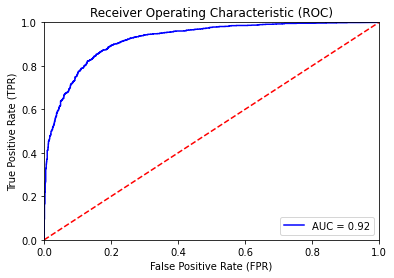

In [78]:
roc_auc = auc(fpr, tpr) 

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

The RandomForestClassification gives the best F1 Score :- 0.85 and Accuracy:- 0.85 which is the best of all the techniques. 
Looking at model results, the best accuracy on the test set is achieved by the RandomForestClassification with 0.85

************** Thank you ***********************